In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    root_mean_squared_error,
    mean_absolute_percentage_error
)
from sklearn.linear_model import LinearRegression

In [2]:
df_data = pd.read_csv("housing-datasets/data.csv")
df_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df_fields = pd.read_csv("housing-datasets/fields.csv")
df_fields

,name,description,type,category,is_target
0,id,Unique identifier.,int,meta,False
1,date,Date the house was sold.,str,temporal,False
2,price,The sale price.,float,outcome,True
3,bedrooms,Number of bedrooms.,int,property,False
4,bathrooms,Number of bathrooms.,float,property,False
5,sqft_living,Total interior living space (sqft).,int,property,False
6,sqft_lot,Total land area (sqft).,int,property,False
7,floors,Number of floors.,float,property,False
8,waterfront,A binary flag (1 if it has a waterfront view).,int,property,False
9,view,A rating from 0 to 4 of how good the view is.,int,quality,False


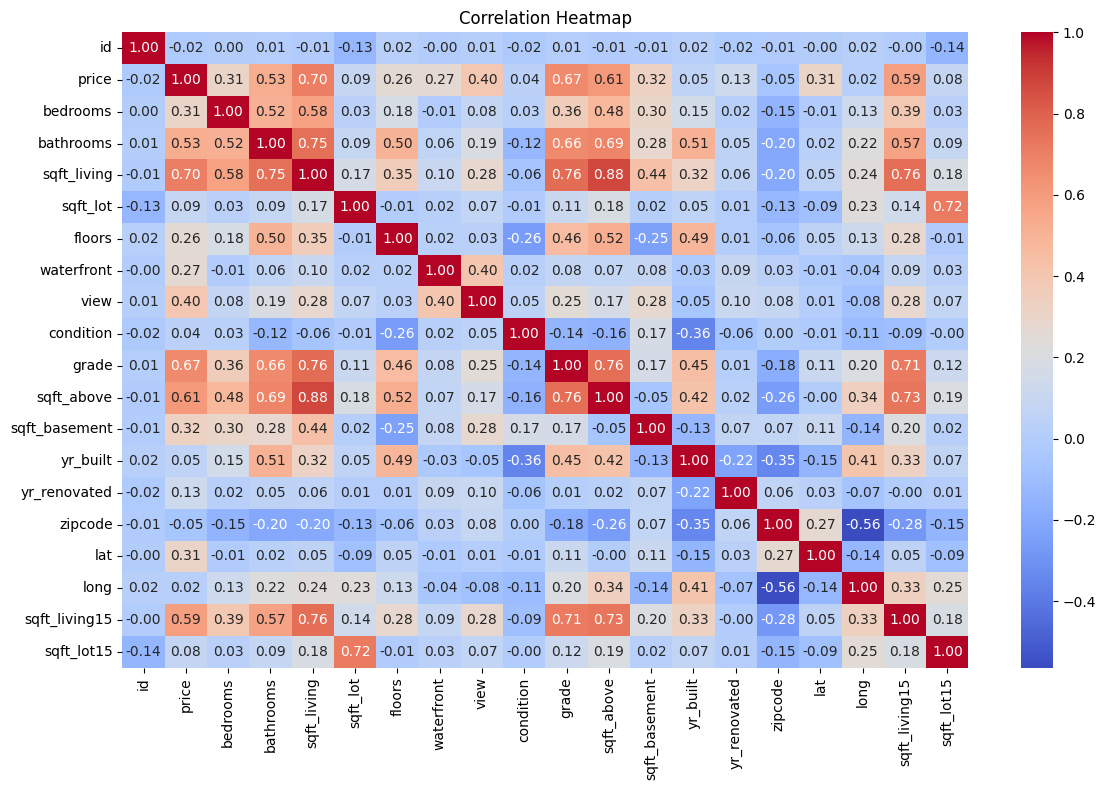

In [4]:
corr = df_data.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()

In [5]:
df_data["my_new_feature"] = 1

In [6]:
df_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,my_new_feature
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1


In [9]:
df_train, df_test = train_test_split(df_data, test_size=0.2, random_state=42)

In [10]:
print(f"{df_data.shape=}")
print(f"{df_train.shape=}")
print(f"{df_test.shape=}")

df_data.shape=(21613, 22)
df_train.shape=(17290, 22)
df_test.shape=(4323, 22)


In [ ]:
# Train model
# features = ["sqft_above", "sqft_living", "zipcode","yr_renovated"]  # Use list of column names to preserve dataframe
features = ["sqft_above", "sqft_living", "zipcode","yr_renovated", "grade", "sqft_above"] 
target = "price"

X_train = df_train[features]
y_train = df_train[target]

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
model.coef_

array([ -3.27057821, 287.30060769, 582.4577725 ,  75.34259832])

In [15]:
model.intercept_

np.float64(-57184754.271102875)

In [16]:
X_test = df_test[features]
y_test = df_test[target]

In [17]:
y_test_pred = model.predict(X_test)

In [18]:
mean_squared_error(y_test, y_test_pred)

74680732338.25653

In [19]:
root_mean_squared_error(y_test, y_test_pred)

273277.75675721676

In [20]:
mean_absolute_percentage_error(y_test, y_test_pred) * 100

35.12672027337392